In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("processed_data.csv")

In [3]:
data

,X,flag,alon_week,alon_wend,child_bull,comp_house,comp_noint_bed_16,comp_int_bed_16,comp_week,comp_wend,...,talk_phon_wend,text_week,text_wend,tran_week,tran_wend,tv_week,tv_wend,weight_16,work_week,work_wend
0,1,synthetic,1-2 hours,1-2 hours,No,Yes,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,59.294132,3 or more hours,3 or more hours
1,2,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.812426,NaN,NaN
4,5,synthetic,1-2 hours,3 or more hours,No,NaN,Yes,NaN,1-2 hours,Less than 1 hour,...,Not at all,Not at all,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,3 or more hours,62.270030,1-2 hours,1-2 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13730,13731,synthetic,1-2 hours,3 or more hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Not at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,3 or more hours,3 or more hours,NaN,1-2 hours,1-2 hours
13731,13732,synthetic,1-2 hours,1-2 hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,1-2 hours,1-2 hours,1 or more hours,1 or more hours,3 or more hours,3 or more hours,58.075832,Less than 1 hour,Less than 1 hour
13732,13733,synthetic,Less than 1 hour,1-2 hours,No,Yes,NaN,NaN,Less than 1 hour,1-2 hours,...,Any at all,1-2 hours,1-2 hours,Less than 1 hour,Less than 1 hour,Not at all,Less than 1 hour,NaN,Less than 1 hour,1-2 hours


In [4]:
targets_dep_thoughts = data[['dep_thoughts']]

r2_list = []





# Category A

### Regression: comp_week - dep_thoughts

RMSE value:  1.3040122455415566
R2 value:  -0.005994249768449089


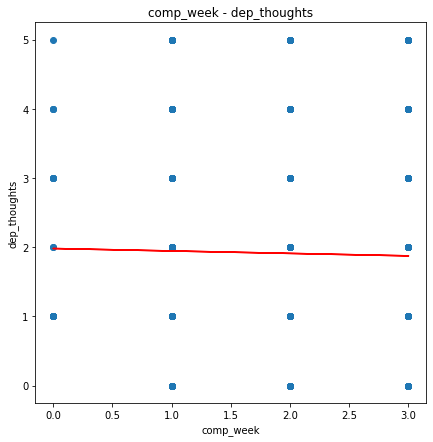

In [5]:
features_comp_week = data[['comp_week']].copy()

features_comp_week.loc[features_comp_week['comp_week'] == 'Not at all', 'comp_week'] = 0
features_comp_week.loc[features_comp_week['comp_week'] == 'Less than 1 hour', 'comp_week'] = 1
features_comp_week.loc[features_comp_week['comp_week'] == '1-2 hours', 'comp_week'] = 2
features_comp_week.loc[features_comp_week['comp_week'] == '3 or more hours', 'comp_week'] = 3

features_comp_week['dep_thoughts'] = targets_dep_thoughts
features_comp_week = features_comp_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_week[['comp_week']], features_comp_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - comp_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_week - dep_thoughts')
ax.set_xlabel('comp_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: comp_wend - dep_thoughts

RMSE value:  1.3391993515205762
R2 value:  -0.0066602563858570996


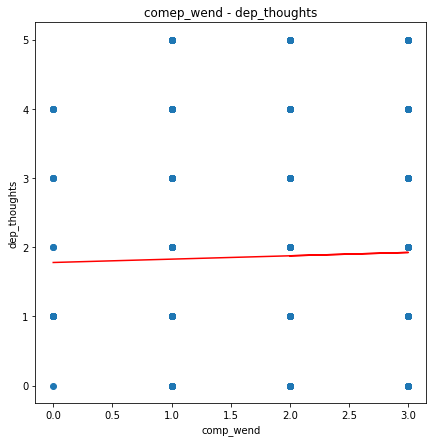

In [6]:
features_comp_wend = data[['comp_wend']].copy()

features_comp_wend.loc[features_comp_wend['comp_wend'] == 'Not at all', 'comp_wend'] = 0
features_comp_wend.loc[features_comp_wend['comp_wend'] == 'Less than 1 hour', 'comp_wend'] = 1
features_comp_wend.loc[features_comp_wend['comp_wend'] == '1-2 hours', 'comp_wend'] = 2
features_comp_wend.loc[features_comp_wend['comp_wend'] == '3 or more hours', 'comp_wend'] = 3

features_comp_wend['dep_thoughts'] = targets_dep_thoughts
features_comp_wend = features_comp_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_wend[['comp_wend']], features_comp_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - comp_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comep_wend - dep_thoughts')
ax.set_xlabel('comp_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: text_week - dep_thoughts

RMSE value:  1.2536336605116307
R2 value:  -0.003978313746138662


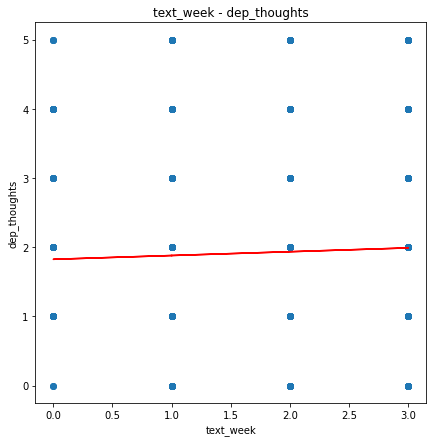

In [7]:
features_text_week = data[['text_week']].copy()

features_text_week.loc[features_text_week['text_week'] == 'Not at all', 'text_week'] = 0
features_text_week.loc[features_text_week['text_week'] == 'Less than 1 hour', 'text_week'] = 1
features_text_week.loc[features_text_week['text_week'] == '1-2 hours', 'text_week'] = 2
features_text_week.loc[features_text_week['text_week'] == '3 or more hours', 'text_week'] = 3

features_text_week['dep_thoughts'] = targets_dep_thoughts
features_text_week = features_text_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_text_week[['text_week']], features_text_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - text_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('text_week - dep_thoughts')
ax.set_xlabel('text_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: text_wend - dep_thoughts

RMSE value:  1.3526843507160156
R2 value:  -0.0015641850387841938


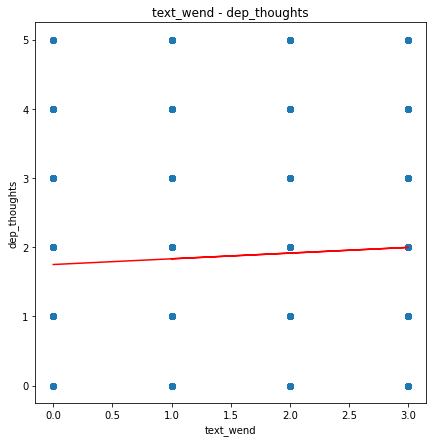

In [8]:
features_text_wend = data[['text_wend']].copy()

features_text_wend.loc[features_text_wend['text_wend'] == 'Not at all', 'text_wend'] = 0
features_text_wend.loc[features_text_wend['text_wend'] == 'Less than 1 hour', 'text_wend'] = 1
features_text_wend.loc[features_text_wend['text_wend'] == '1-2 hours', 'text_wend'] = 2
features_text_wend.loc[features_text_wend['text_wend'] == '3 or more hours', 'text_wend'] = 3

features_text_wend['dep_thoughts'] = targets_dep_thoughts
features_text_wend = features_text_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_text_wend[['text_wend']], features_text_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - text_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('text_wend - dep_thoughts')
ax.set_xlabel('text_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: tv_week - dep_thoughts

RMSE value:  1.2564093685366535
R2 value:  -0.0006084824900127739


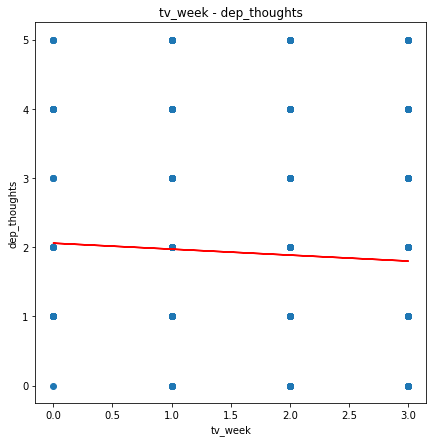

In [9]:
features_tv_week = data[['tv_week']].copy()

features_tv_week.loc[features_tv_week['tv_week'] == 'Not at all', 'tv_week'] = 0
features_tv_week.loc[features_tv_week['tv_week'] == 'Less than 1 hour', 'tv_week'] = 1
features_tv_week.loc[features_tv_week['tv_week'] == '1-2 hours', 'tv_week'] = 2
features_tv_week.loc[features_tv_week['tv_week'] == '3 or more hours', 'tv_week'] = 3

features_tv_week['dep_thoughts'] = targets_dep_thoughts
features_tv_week = features_tv_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_tv_week[['tv_week']], features_tv_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - tv_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('tv_week - dep_thoughts')
ax.set_xlabel('tv_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: tv_wend - dep_thoughts

RMSE value:  1.2261517896690262
R2 value:  -0.003651930480040644


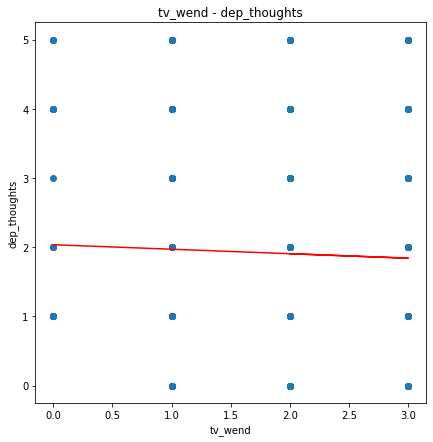

In [10]:
features_tv_wend = data[['tv_wend']].copy()

features_tv_wend.loc[features_tv_wend['tv_wend'] == 'Not at all', 'tv_wend'] = 0
features_tv_wend.loc[features_tv_wend['tv_wend'] == 'Less than 1 hour', 'tv_wend'] = 1
features_tv_wend.loc[features_tv_wend['tv_wend'] == '1-2 hours', 'tv_wend'] = 2
features_tv_wend.loc[features_tv_wend['tv_wend'] == '3 or more hours', 'tv_wend'] = 3

features_tv_wend['dep_thoughts'] = targets_dep_thoughts
features_tv_wend = features_tv_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_tv_wend[['tv_wend']], features_tv_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('A - tv_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('tv_wend - dep_thoughts')
ax.set_xlabel('tv_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category C

### Regression: dep_band_15 - dep_thoughts

RMSE value:  1.3220594941914632
R2 value:  -0.012035619105522422


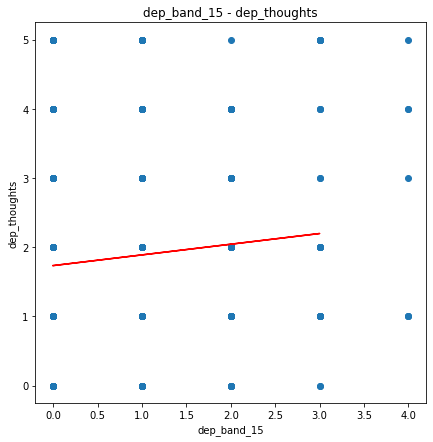

In [11]:
features_dep_band_15 = data[['dep_band_15']].copy()

features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '<0.1%', 'dep_band_15'] = 0
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '~0.5%', 'dep_band_15'] = 1
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '~15%', 'dep_band_15'] = 2
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '~50%', 'dep_band_15'] = 3
features_dep_band_15.loc[features_dep_band_15['dep_band_15'] == '>70%', 'dep_band_15'] = 4

features_dep_band_15['dep_thoughts'] = targets_dep_thoughts
features_dep_band_15 = features_dep_band_15.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_dep_band_15[['dep_band_15']], features_dep_band_15[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('C - dep_band_15', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('dep_band_15 - dep_thoughts')
ax.set_xlabel('dep_band_15')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category B

### Regression: comp_house - dep_thoughts

RMSE value:  1.3192238485185144
R2 value:  -0.0002020474137931494


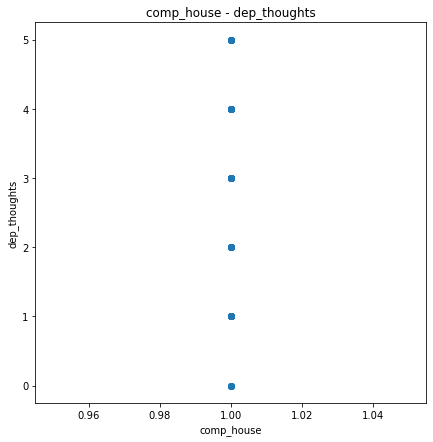

In [12]:
features_comp_house = data[['comp_house']].copy()

features_comp_house.loc[features_comp_house['comp_house'] == 'Yes', 'comp_house'] = 1
features_comp_house.loc[features_comp_house['comp_house'] == 'No', 'comp_house'] = 0

features_comp_house['dep_thoughts'] = targets_dep_thoughts
features_comp_house = features_comp_house.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_house[['comp_house']], features_comp_house[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B - comp_house', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_house - dep_thoughts')
ax.set_xlabel('comp_house')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: comp_int_bed_16 - dep_thoughts

RMSE value:  1.1151617918854861
R2 value:  -0.013053011937550263


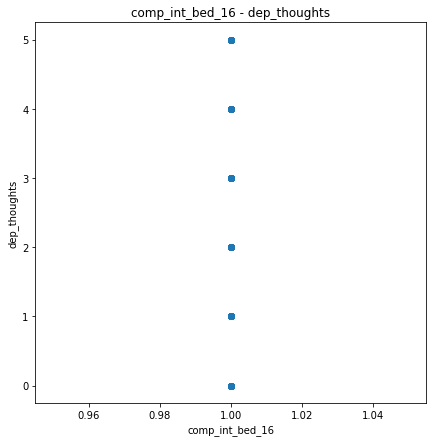

In [13]:
features_comp_int_bed_16 = data[['comp_int_bed_16']].copy()

features_comp_int_bed_16.loc[features_comp_int_bed_16['comp_int_bed_16'] == 'Yes', 'comp_int_bed_16'] = 1
features_comp_int_bed_16.loc[features_comp_int_bed_16['comp_int_bed_16'] == 'No', 'comp_int_bed_16'] = 0

features_comp_int_bed_16['dep_thoughts'] = targets_dep_thoughts
features_comp_int_bed_16 = features_comp_int_bed_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_int_bed_16[['comp_int_bed_16']], features_comp_int_bed_16[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B - comp_int_bed_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_int_bed_16 - dep_thoughts')
ax.set_xlabel('comp_int_bed_16')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: comp_noint_bed_16 - dep_thoughts

RMSE value:  1.446431381950094
R2 value:  -0.05484792054624488


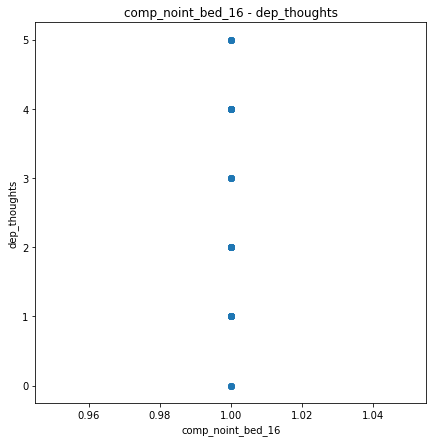

In [14]:
features_comp_noint_bed_16 = data[['comp_noint_bed_16']].copy()

features_comp_noint_bed_16.loc[features_comp_noint_bed_16['comp_noint_bed_16'] == 'Yes', 'comp_noint_bed_16'] = 1
features_comp_noint_bed_16.loc[features_comp_noint_bed_16['comp_noint_bed_16'] == 'No', 'comp_noint_bed_16'] = 0

features_comp_noint_bed_16['dep_thoughts'] = targets_dep_thoughts
features_comp_noint_bed_16 = features_comp_noint_bed_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_comp_noint_bed_16[['comp_noint_bed_16']], features_comp_noint_bed_16[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B - comp_noint_bed_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('comp_noint_bed_16 - dep_thoughts')
ax.set_xlabel('comp_noint_bed_16')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category D

### Regression: alon_week - dep_thoughts

RMSE value:  1.3307089418869036
R2 value:  -0.008087353552214793


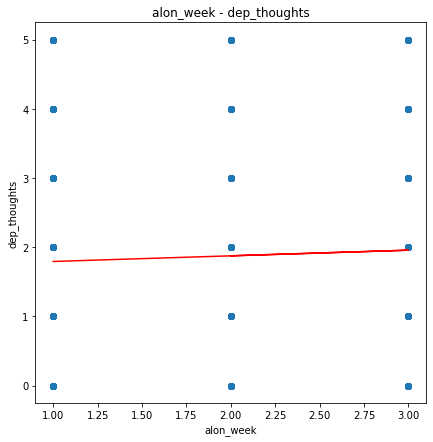

In [15]:
features_alon_week = data[['alon_week']].copy()

features_alon_week.loc[features_alon_week['alon_week'] == 'Not at all', 'alon_week'] = 0
features_alon_week.loc[features_alon_week['alon_week'] == 'Less than 1 hour', 'alon_week'] = 1
features_alon_week.loc[features_alon_week['alon_week'] == '1-2 hours', 'alon_week'] = 2
features_alon_week.loc[features_alon_week['alon_week'] == '3 or more hours', 'alon_week'] = 3

features_alon_week['dep_thoughts'] = targets_dep_thoughts
features_alon_week = features_alon_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_alon_week[['alon_week']], features_alon_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - alon_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('alon_week - dep_thoughts')
ax.set_xlabel('alon_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: alon_wend - dep_thoughts

RMSE value:  1.251074474130969
R2 value:  -0.007028147665196549


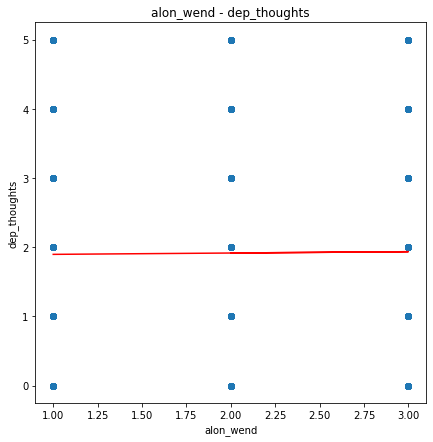

In [16]:
features_alon_wend = data[['alon_wend']].copy()

features_alon_wend.loc[features_alon_wend['alon_wend'] == 'Not at all', 'alon_wend'] = 0
features_alon_wend.loc[features_alon_wend['alon_wend'] == 'Less than 1 hour', 'alon_wend'] = 1
features_alon_wend.loc[features_alon_wend['alon_wend'] == '1-2 hours', 'alon_wend'] = 2
features_alon_wend.loc[features_alon_wend['alon_wend'] == '3 or more hours', 'alon_wend'] = 3

features_alon_wend['dep_thoughts'] = targets_dep_thoughts
features_alon_wend = features_alon_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_alon_wend[['alon_wend']], features_alon_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - alon_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('alon_wend - dep_thoughts')
ax.set_xlabel('alon_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: child_bull - dep_thoughts

RMSE value:  1.332795987589591
R2 value:  -0.0014876925967497456


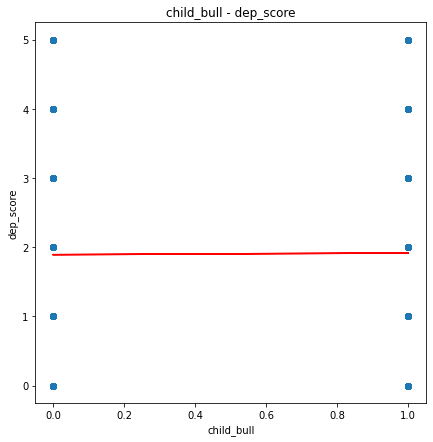

In [17]:
features_child_bull = data[['child_bull']].copy()

features_child_bull.loc[features_child_bull['child_bull'] == 'Yes', 'child_bull'] = 1
features_child_bull.loc[features_child_bull['child_bull'] == 'No', 'child_bull'] = 0

features_child_bull['dep_thoughts'] = targets_dep_thoughts
features_child_bull = features_child_bull.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_child_bull[['child_bull']], features_child_bull[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - child_bull', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('child_bull - dep_score')
ax.set_xlabel('child_bull')
ax.set_ylabel('dep_score')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: height_16 - dep_thoughts

RMSE value:  1.2691888828436986
R2 value:  -0.009425210272855589


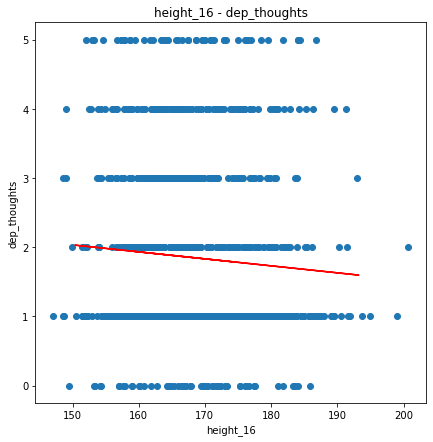

In [18]:
features_height_16 = data[['height_16']].copy()

features_height_16['dep_thoughts'] = targets_dep_thoughts
features_height_16 = features_height_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_height_16[['height_16']], features_height_16[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - height_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('height_16 - dep_thoughts')
ax.set_xlabel('height_16')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: weight_16 - dep_thoughts

RMSE value:  1.3114522381275504
R2 value:  -0.00012800267024903889


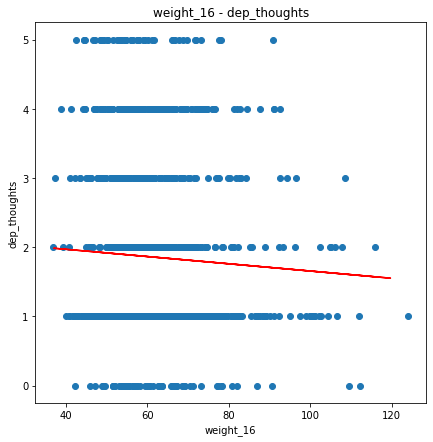

In [19]:
features_weight_16 = data[['weight_16']].copy()

features_weight_16['dep_thoughts'] = targets_dep_thoughts
features_weight_16 = features_weight_16.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_weight_16[['weight_16']], features_weight_16[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - weight_16', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('weight_16 - dep_thoughts')
ax.set_xlabel('weight_16')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

In [20]:
### Regression: work_week - dep_score

RMSE value:  1.3076320831590562
R2 value:  0.004867908456877679


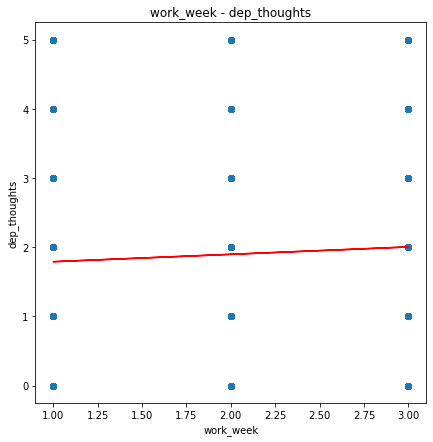

In [21]:
features_work_week = data[['work_week']].copy()

features_work_week.loc[features_work_week['work_week'] == 'Not at all', 'work_week'] = 0
features_work_week.loc[features_work_week['work_week'] == 'Less than 1 hour', 'work_week'] = 1
features_work_week.loc[features_work_week['work_week'] == '1-2 hours', 'work_week'] = 2
features_work_week.loc[features_work_week['work_week'] == '3 or more hours', 'work_week'] = 3

features_work_week['dep_thoughts'] = targets_dep_thoughts
features_work_week = features_work_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_work_week[['work_week']], features_work_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - work_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('work_week - dep_thoughts')
ax.set_xlabel('work_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: work_wend - dep_thoughts

RMSE value:  1.3605303100902104
R2 value:  -0.0006655346674329099


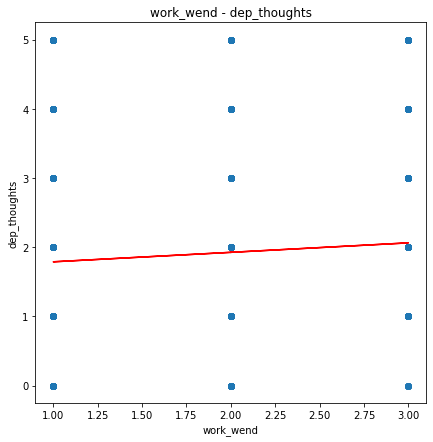

In [22]:
features_work_wend = data[['work_wend']].copy()

features_work_wend.loc[features_work_wend['work_wend'] == 'Not at all', 'work_wend'] = 0
features_work_wend.loc[features_work_wend['work_wend'] == 'Less than 1 hour', 'work_wend'] = 1
features_work_wend.loc[features_work_wend['work_wend'] == '1-2 hours', 'work_wend'] = 2
features_work_wend.loc[features_work_wend['work_wend'] == '3 or more hours', 'work_wend'] = 3

features_work_wend['dep_thoughts'] = targets_dep_thoughts
features_work_wend = features_work_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_work_wend[['work_wend']], features_work_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('D - work_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('work_wend - dep_thoughts')
ax.set_xlabel('work_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

# Category B & D

### Regression: draw_week - dep_thoughts

RMSE value:  1.3493237930618533
R2 value:  -0.0007611528340523144


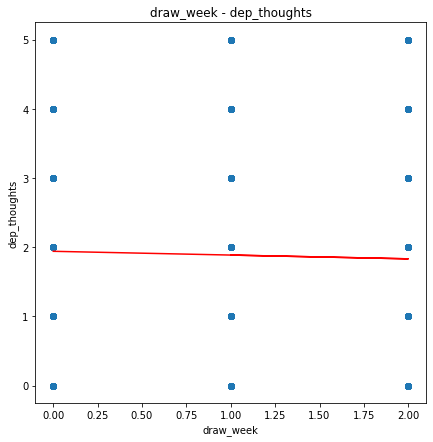

In [23]:
features_draw_week = data[['draw_week']].copy()

features_draw_week.loc[features_draw_week['draw_week'] == 'Not at all', 'draw_week'] = 0
features_draw_week.loc[features_draw_week['draw_week'] == 'Less than 1 hour', 'draw_week'] = 1
features_draw_week.loc[features_draw_week['draw_week'] == '1 or more hours', 'draw_week'] = 2

features_draw_week['dep_thoughts'] = targets_dep_thoughts
features_draw_week = features_draw_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_draw_week[['draw_week']], features_draw_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - draw_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('draw_week - dep_thoughts')
ax.set_xlabel('draw_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: draw_wend - dep_thoughts

RMSE value:  1.305775364426187
R2 value:  -0.0015200916814022136


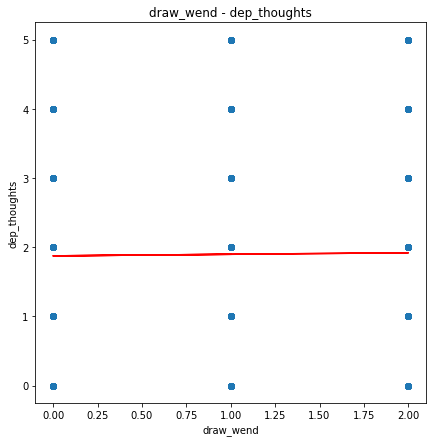

In [24]:
features_draw_wend = data[['draw_wend']].copy()

features_draw_wend.loc[features_draw_wend['draw_wend'] == 'Not at all', 'draw_wend'] = 0
features_draw_wend.loc[features_draw_wend['draw_wend'] == 'Less than 1 hour', 'draw_wend'] = 1
features_draw_wend.loc[features_draw_wend['draw_wend'] == '1 or more hours', 'draw_wend'] = 2

features_draw_wend['dep_thoughts'] = targets_dep_thoughts
features_draw_wend = features_draw_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_draw_wend[['draw_wend']], features_draw_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - draw_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('draw_wend - dep_thoughts')
ax.set_xlabel('draw_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: exercise - dep_thoughts

RMSE value:  1.4442363650023298
R2 value:  -0.016910886814583748


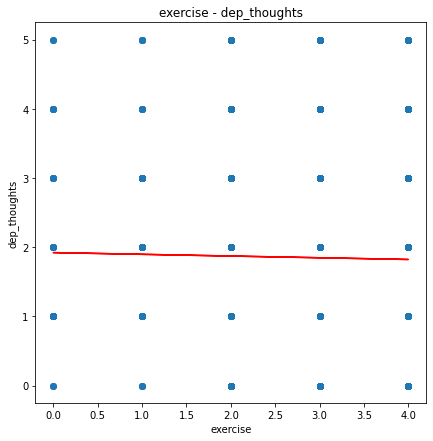

In [25]:
features_exercise = data[['exercise']].copy()

features_exercise.loc[features_exercise['exercise'] == 'Never', 'exercise'] = 0
features_exercise.loc[features_exercise['exercise'] == 'Less than once a month', 'exercise'] = 1
features_exercise.loc[features_exercise['exercise'] == '1-3 times a month', 'exercise'] = 2
features_exercise.loc[features_exercise['exercise'] == '1-4 times a week', 'exercise'] = 3
features_exercise.loc[features_exercise['exercise'] == '5 or more times a week', 'exercise'] = 4

features_exercise['dep_thoughts'] = targets_dep_thoughts
features_exercise = features_exercise.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_exercise[['exercise']], features_exercise[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - exercise', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('exercise - dep_thoughts')
ax.set_xlabel('exercise')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: musi_week - dep_thoughts

RMSE value:  1.3115431187078068
R2 value:  -0.0024297358225935373


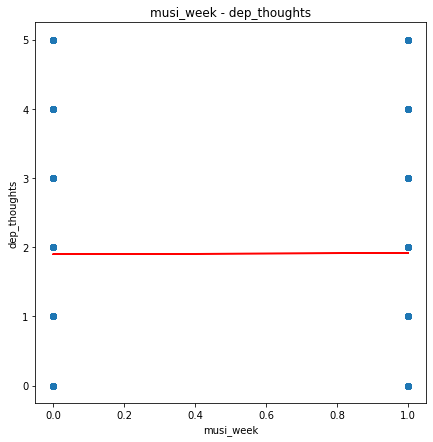

In [26]:
features_musi_week = data[['musi_week']].copy()

features_musi_week.loc[features_musi_week['musi_week'] == 'Not at all', 'musi_week'] = 0
features_musi_week.loc[features_musi_week['musi_week'] == 'Any at all', 'musi_week'] = 1

features_musi_week['dep_thoughts'] = targets_dep_thoughts
features_musi_week = features_musi_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_musi_week[['musi_week']], features_musi_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - musi_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('musi_week - dep_thoughts')
ax.set_xlabel('musi_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: musi_wend - dep_thoughts

RMSE value:  1.2500143080489685
R2 value:  -0.03661317207989745


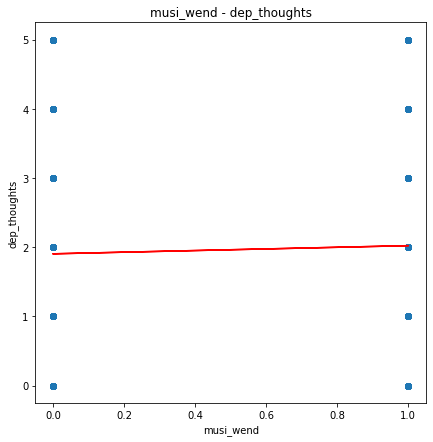

In [27]:
features_musi_wend = data[['musi_wend']].copy()

features_musi_wend.loc[features_musi_wend['musi_wend'] == 'Not at all', 'musi_wend'] = 0
features_musi_wend.loc[features_musi_wend['musi_wend'] == 'Any at all', 'musi_wend'] = 1

features_musi_wend['dep_thoughts'] = targets_dep_thoughts
features_musi_wend = features_musi_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_musi_wend[['musi_wend']], features_musi_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - musi_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('musi_wend - dep_thoughts')
ax.set_xlabel('musi_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

RMSE value:  1.3162762935391765
R2 value:  0.0023965981475374543


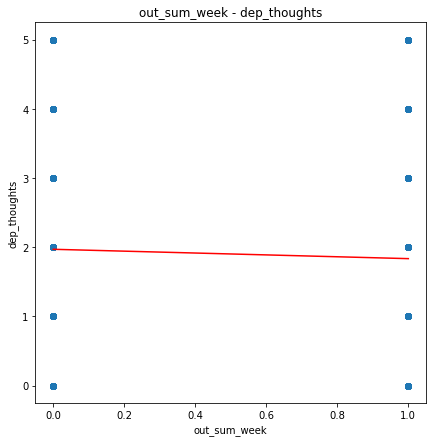

In [28]:
features_out_sum_week = data[['out_sum_week']].copy()

features_out_sum_week.loc[features_out_sum_week['out_sum_week'] == 'Less than 3 hours', 'out_sum_week'] = 0
features_out_sum_week.loc[features_out_sum_week['out_sum_week'] == '3 or more hours', 'out_sum_week'] = 1

features_out_sum_week['dep_thoughts'] = targets_dep_thoughts
features_out_sum_week = features_out_sum_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_sum_week[['out_sum_week']], features_out_sum_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_sum_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_sum_week - dep_thoughts')
ax.set_xlabel('out_sum_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_sum_wend - dep_thoughts

RMSE value:  1.3419486104322447
R2 value:  0.002214918169741953


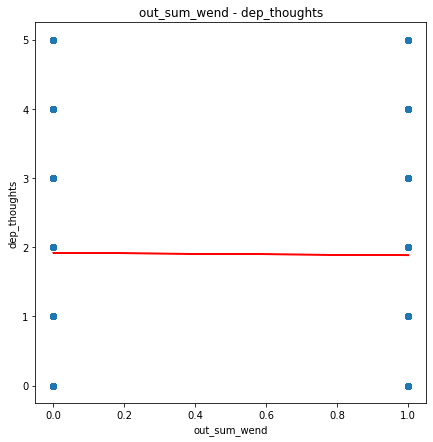

In [29]:
features_out_sum_wend = data[['out_sum_wend']].copy()

features_out_sum_wend.loc[features_out_sum_wend['out_sum_wend'] == 'Less than 3 hours', 'out_sum_wend'] = 0
features_out_sum_wend.loc[features_out_sum_wend['out_sum_wend'] == '3 or more hours', 'out_sum_wend'] = 1

features_out_sum_wend['dep_thoughts'] = targets_dep_thoughts
features_out_sum_wend = features_out_sum_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_sum_wend[['out_sum_wend']], features_out_sum_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_sum_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_sum_wend - dep_thoughts')
ax.set_xlabel('out_sum_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_win_week - dep_thoughts

RMSE value:  1.3445064990970035
R2 value:  -0.0030968605970682628


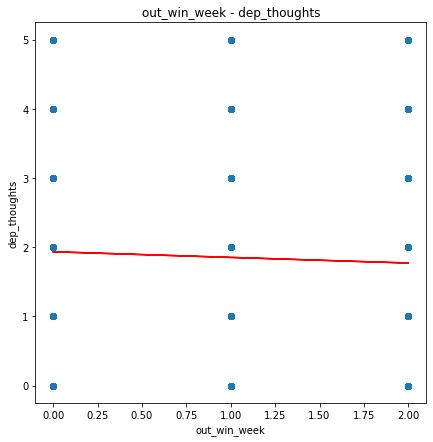

In [30]:
features_out_win_week = data[['out_win_week']].copy()

features_out_win_week.loc[features_out_win_week['out_win_week'] == 'Less than 1 hour', 'out_win_week'] = 0
features_out_win_week.loc[features_out_win_week['out_win_week'] == '1-2 hours', 'out_win_week'] = 1
features_out_win_week.loc[features_out_win_week['out_win_week'] == '3 or more hours', 'out_win_week'] = 2

features_out_win_week['dep_thoughts'] = targets_dep_thoughts
features_out_win_week = features_out_win_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_win_week[['out_win_week']], features_out_win_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_win_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_win_week - dep_thoughts')
ax.set_xlabel('out_win_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: out_win_wend - dep_thoughts

RMSE value:  1.3644217822877591
R2 value:  -0.0041636424619915235


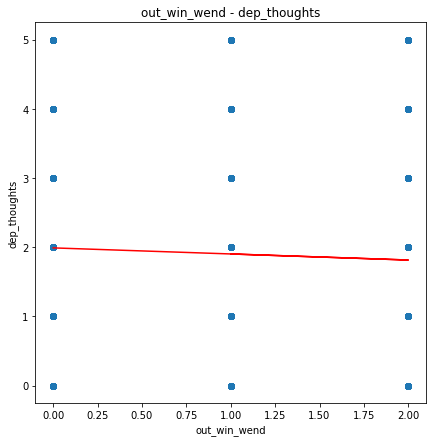

In [31]:
features_out_win_wend = data[['out_win_wend']].copy()

features_out_win_wend.loc[features_out_win_wend['out_win_wend'] == 'Less than 1 hour', 'out_win_wend'] = 0
features_out_win_wend.loc[features_out_win_wend['out_win_wend'] == '1-2 hours', 'out_win_wend'] = 1
features_out_win_wend.loc[features_out_win_wend['out_win_wend'] == '3 or more hours', 'out_win_wend'] = 2

features_out_win_wend['dep_thoughts'] = targets_dep_thoughts
features_out_win_wend = features_out_win_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_out_win_wend[['out_win_wend']], features_out_win_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - out_win_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('out_win_wend - dep_thoughts')
ax.set_xlabel('out_win_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: play_week - dep_thoughts

RMSE value:  1.2666406317814454
R2 value:  -0.012899602620196182


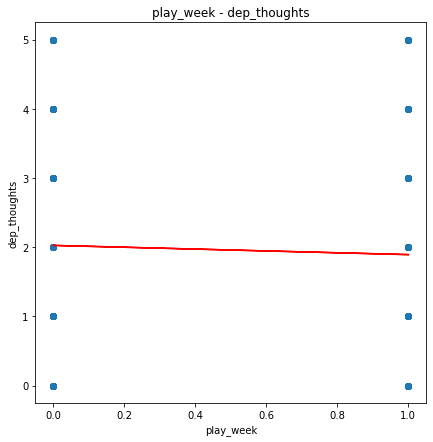

In [32]:
features_play_week = data[['play_week']].copy()

features_play_week.loc[features_play_week['play_week'] == 'Less than 3 hours', 'play_week'] = 0
features_play_week.loc[features_play_week['play_week'] == '3 or more hours', 'play_week'] = 1

features_play_week['dep_thoughts'] = targets_dep_thoughts
features_play_week = features_play_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_play_week[['play_week']], features_play_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - play_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('play_week - dep_thoughts')
ax.set_xlabel('play_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: play_wend - dep_thoughts

RMSE value:  1.3134518691502788
R2 value:  -0.006534380553143038


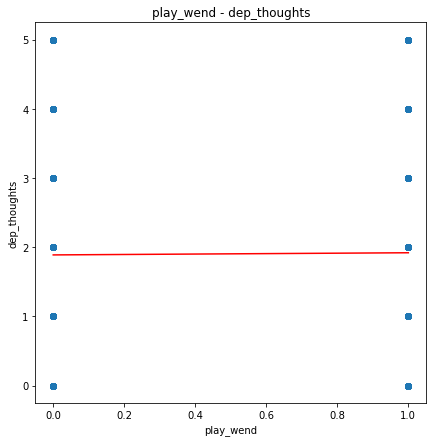

In [33]:
features_play_wend = data[['play_wend']].copy()

features_play_wend.loc[features_play_wend['play_wend'] == 'Less than 3 hours', 'play_wend'] = 0
features_play_wend.loc[features_play_wend['play_wend'] == '3 or more hours', 'play_wend'] = 1

features_play_wend['dep_thoughts'] = targets_dep_thoughts
features_play_wend = features_play_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_play_wend[['play_wend']], features_play_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - play_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('play_wend - dep_thoughts')
ax.set_xlabel('play_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: read_week - dep_thoughts

RMSE value:  1.3116223937398979
R2 value:  -0.001695822825128701


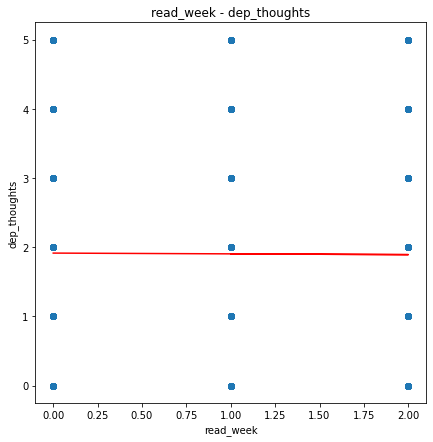

In [34]:
features_read_week = data[['read_week']].copy()

features_read_week.loc[features_read_week['read_week'] == 'Not at all', 'read_week'] = 0
features_read_week.loc[features_read_week['read_week'] == 'Less than 1 hour', 'read_week'] = 1
features_read_week.loc[features_read_week['read_week'] == '1 or more hours', 'read_week'] = 2

features_read_week['dep_thoughts'] = targets_dep_thoughts
features_read_week = features_read_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_read_week[['read_week']], features_read_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - read_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('read_week - dep_thoughts')
ax.set_xlabel('read_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: read_wend - dep_thoughts

RMSE value:  1.3380645276653724
R2 value:  -0.0037759614476358117


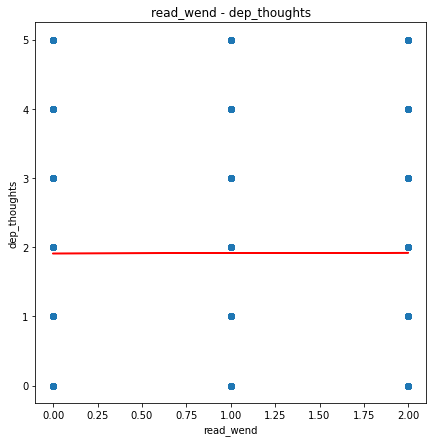

In [35]:
features_read_wend = data[['read_wend']].copy()

features_read_wend.loc[features_read_wend['read_wend'] == 'Not at all', 'read_wend'] = 0
features_read_wend.loc[features_read_wend['read_wend'] == 'Less than 1 hour', 'read_wend'] = 1
features_read_wend.loc[features_read_wend['read_wend'] == '1 or more hours', 'read_wend'] = 2

features_read_wend['dep_thoughts'] = targets_dep_thoughts
features_read_wend = features_read_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_read_wend[['read_wend']], features_read_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - read_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('read_wend - dep_thoughts')
ax.set_xlabel('read_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_mob_week - dep_thoughts

RMSE value:  1.2563091152498527
R2 value:  0.001279728093417365


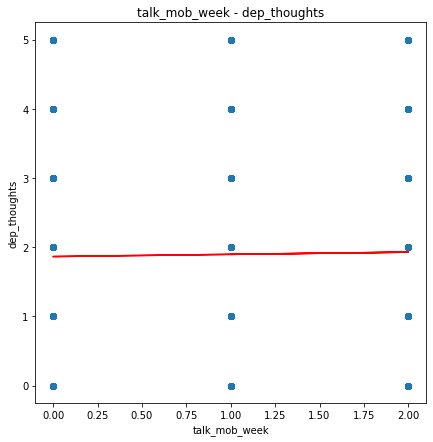

In [36]:
features_talk_mob_week = data[['talk_mob_week']].copy()

features_talk_mob_week.loc[features_talk_mob_week['talk_mob_week'] == 'Not at all', 'talk_mob_week'] = 0
features_talk_mob_week.loc[features_talk_mob_week['talk_mob_week'] == 'Less than 1 hour', 'talk_mob_week'] = 1
features_talk_mob_week.loc[features_talk_mob_week['talk_mob_week'] == '1 or more hours', 'talk_mob_week'] = 2

features_talk_mob_week['dep_thoughts'] = targets_dep_thoughts
features_talk_mob_week = features_talk_mob_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_mob_week[['talk_mob_week']], features_talk_mob_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_mob_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_mob_week - dep_thoughts')
ax.set_xlabel('talk_mob_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_mob_wend - dep_thoughts

RMSE value:  1.2988589496393845
R2 value:  -0.00011690361303084984


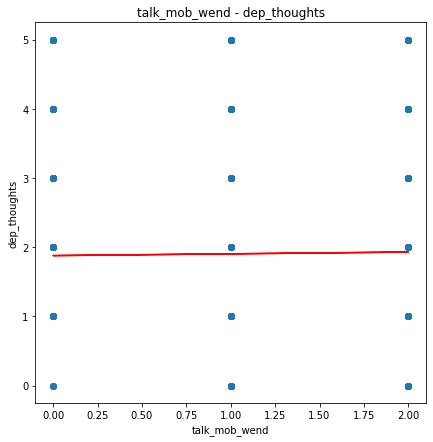

In [37]:
features_talk_mob_wend = data[['talk_mob_wend']].copy()

features_talk_mob_wend.loc[features_talk_mob_wend['talk_mob_wend'] == 'Not at all', 'talk_mob_wend'] = 0
features_talk_mob_wend.loc[features_talk_mob_wend['talk_mob_wend'] == 'Less than 1 hour', 'talk_mob_wend'] = 1
features_talk_mob_wend.loc[features_talk_mob_wend['talk_mob_wend'] == '1 or more hours', 'talk_mob_wend'] = 2

features_talk_mob_wend['dep_thoughts'] = targets_dep_thoughts
features_talk_mob_wend = features_talk_mob_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_mob_wend[['talk_mob_wend']], features_talk_mob_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_mob_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_mob_wend - dep_thoughts')
ax.set_xlabel('talk_mob_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_phon_week - dep_thoughts

RMSE value:  1.2643794228296537
R2 value:  -0.035541394802158344


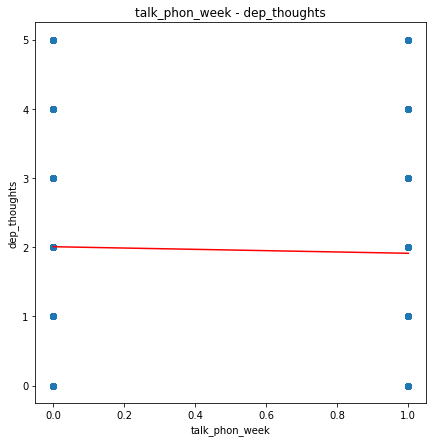

In [38]:
features_talk_phon_week = data[['talk_phon_week']].copy()

features_talk_phon_week.loc[features_talk_phon_week['talk_phon_week'] == 'Not at all', 'talk_phon_week'] = 0
features_talk_phon_week.loc[features_talk_phon_week['talk_phon_week'] == 'Any at all', 'talk_phon_week'] = 1

features_talk_phon_week['dep_thoughts'] = targets_dep_thoughts
features_talk_phon_week = features_talk_phon_week.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_phon_week[['talk_phon_week']], features_talk_phon_week[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_phon_week', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_phon_week - dep_thoughts')
ax.set_xlabel('talk_phon_week')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

### Regression: talk_phon_wend - dep_thoughts

RMSE value:  1.29600395828229
R2 value:  -0.005159176408909838


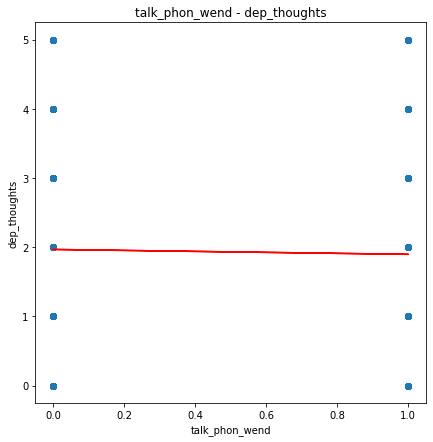

In [39]:
features_talk_phon_wend = data[['talk_phon_wend']].copy()

features_talk_phon_wend.loc[features_talk_phon_wend['talk_phon_wend'] == 'Not at all', 'talk_phon_wend'] = 0
features_talk_phon_wend.loc[features_talk_phon_wend['talk_phon_wend'] == 'Any at all', 'talk_phon_wend'] = 1

features_talk_phon_wend['dep_thoughts'] = targets_dep_thoughts
features_talk_phon_wend = features_talk_phon_wend.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(features_talk_phon_wend[['talk_phon_wend']], features_talk_phon_wend[['dep_thoughts']], test_size=0.2, random_state=48)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_test, y_pred)
r2_list.append(('B&D - talk_phon_wend', r2_point))

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_train, y_train)
ax.plot(X_test, y_pred, 'r-')
ax.set_title('talk_phon_wend - dep_thoughts')
ax.set_xlabel('talk_phon_wend')
ax.set_ylabel('dep_thoughts')

print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

In [40]:
r2_list.sort(key=lambda x:-x[1])
print("R2 sorted list\n")
for x, y in r2_list:
    print(x, y)

R2 sorted list

D - work_week 0.004867908456877679
B&D - out_sum_week 0.0023965981475374543
B&D - out_sum_wend 0.002214918169741953
B&D - talk_mob_week 0.001279728093417365
B&D - talk_mob_wend -0.00011690361303084984
D - weight_16 -0.00012800267024903889
B - comp_house -0.0002020474137931494
A - tv_week -0.0006084824900127739
D - work_wend -0.0006655346674329099
B&D - draw_week -0.0007611528340523144
D - child_bull -0.0014876925967497456
B&D - draw_wend -0.0015200916814022136
A - text_wend -0.0015641850387841938
B&D - read_week -0.001695822825128701
B&D - musi_week -0.0024297358225935373
B&D - out_win_week -0.0030968605970682628
A - tv_wend -0.003651930480040644
B&D - read_wend -0.0037759614476358117
A - text_week -0.003978313746138662
B&D - out_win_wend -0.0041636424619915235
B&D - talk_phon_wend -0.005159176408909838
A - comp_week -0.005994249768449089
B&D - play_wend -0.006534380553143038
A - comp_wend -0.0066602563858570996
D - alon_wend -0.007028147665196549
D - alon_week -0.00808